In [27]:
import os
from pathlib import Path

import IPython.display as ipd
import librosa
import matplotlib
from matplotlib import pyplot as plt
from numba import jit
import numpy as np
import pandas as pd
import scipy

import sys
sys.path.append('..')

%matplotlib inline

In [56]:
# Load the data
fn_wav = Path('..', 'data', 'datasets', 'raw/audio', 'YTB-007.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs)

# Compute Magnitude STFT
N = 4096
H = 1024
# STFT of fn_wav - returns complex-valued matrix
X = librosa.stft(x, n_fft=N, hop_length=H)
X = X[1000:1200, :]



In [57]:
# Various ways to print, view, and display X

# 1. Basic info and statistics
print("=== Basic Info ===")
print(f"Shape: {X.shape}")
print(f"Dtype: {X.dtype}")
print(f"Size: {X.size:,} elements")
print(f"Memory: {X.nbytes / 1024**2:.2f} MB")


=== Basic Info ===
Shape: (200, 3103)
Dtype: complex64
Size: 620,600 elements
Memory: 4.73 MB


In [58]:

# 2. Statistics (on magnitude)
X_mag = np.abs(X)
print("\n=== Magnitude Statistics ===")
print(f"Min magnitude: {X_mag.min():.6f}")
print(f"Max magnitude: {X_mag.max():.6f}")
print(f"Mean magnitude: {X_mag.mean():.6f}")
print(f"Std magnitude: {X_mag.std():.6f}")



=== Magnitude Statistics ===
Min magnitude: 0.000001
Max magnitude: 47.905254
Mean magnitude: 1.373161
Std magnitude: 1.976248


In [59]:

# 3. Print with different numpy options
print("\n=== Different Print Styles ===")
print("First 3x3 slice (default):")
print(X[:3, :3])
print("\nFirst 3x3 slice (suppress scientific notation):")
np.set_printoptions(suppress=True, precision=4)
print(X[:3, :3])
np.set_printoptions()  # reset



=== Different Print Styles ===
First 3x3 slice (default):
[[-0.    +0.0001j  0.0072+0.0042j  0.0299+0.0368j]
 [ 0.0001-0.0003j -0.0009+0.0101j -0.053 +0.0117j]
 [ 0.0003+0.0003j -0.0093+0.0021j  0.0087-0.012j ]]

First 3x3 slice (suppress scientific notation):
[[-0.    +0.0001j  0.0072+0.0042j  0.0299+0.0368j]
 [ 0.0001-0.0003j -0.0009+0.0101j -0.053 +0.0117j]
 [ 0.0003+0.0003j -0.0093+0.0021j  0.0087-0.012j ]]


In [60]:

# 4. View magnitude and phase separately
print("\n=== Magnitude and Phase ===")
print("Magnitude (first 3x3):")
print(np.abs(X[:3, :3]))
print("\nPhase in radians (first 3x3):")
print(np.angle(X[:3, :3]))
print("\nPhase in degrees (first 3x3):")
print(np.angle(X[:3, :3]) * 180 / np.pi)



=== Magnitude and Phase ===
Magnitude (first 3x3):
[[0.0001 0.0084 0.0474]
 [0.0003 0.0102 0.0543]
 [0.0004 0.0096 0.0148]]

Phase in radians (first 3x3):
[[ 1.7181  0.5292  0.8893]
 [-1.3831  1.6608  2.925 ]
 [ 0.8601  2.9197 -0.9411]]

Phase in degrees (first 3x3):
[[ 98.4424  30.3199  50.9517]
 [-79.2471  95.1578 167.5892]
 [ 49.2785 167.2857 -53.9236]]


In [61]:

# 5. Power spectrogram (magnitude squared)
X_power = np.abs(X)**2
print("\n=== Power Spectrogram ===")
print(f"Power range: {X_power.min():.6e} to {X_power.max():.6e}")
print("First 3x3 power values:")
print(X_power[:3, :3])

# 6. Decibel scale (log magnitude)
X_db = librosa.amplitude_to_db(X_mag)
print("\n=== Decibel Scale ===")
print(f"dB range: {X_db.min():.2f} to {X_db.max():.2f} dB")
print("First 3x3 dB values:")
print(X_db[:3, :3])

# 7. Summary by frequency/time
print("\n=== Summary Statistics ===")
print("Mean magnitude per frequency bin (first 10 bins):")
print(X_mag[:10, :].mean(axis=1))
print("\nMean magnitude per time frame (first 10 frames):")
print(X_mag[:, :10].mean(axis=0))


=== Power Spectrogram ===
Power range: 1.018268e-12 to 2.294913e+03
First 3x3 power values:
[[0.     0.0001 0.0023]
 [0.     0.0001 0.0029]
 [0.     0.0001 0.0002]]

=== Decibel Scale ===
dB range: -46.39 to 33.61 dB
First 3x3 dB values:
[[-46.3923 -41.5562 -26.476 ]
 [-46.3923 -39.8639 -25.3099]
 [-46.3923 -40.3744 -36.5664]]

=== Summary Statistics ===
Mean magnitude per frequency bin (first 10 bins):
[0.9993 1.018  1.0748 1.1443 1.2075 1.2769 1.3045 1.3499 1.5131 1.8929]

Mean magnitude per time frame (first 10 frames):
[0.0003 0.0079 0.0432 1.1803 2.6983 2.1859 1.3375 0.865  0.6755 0.5098]


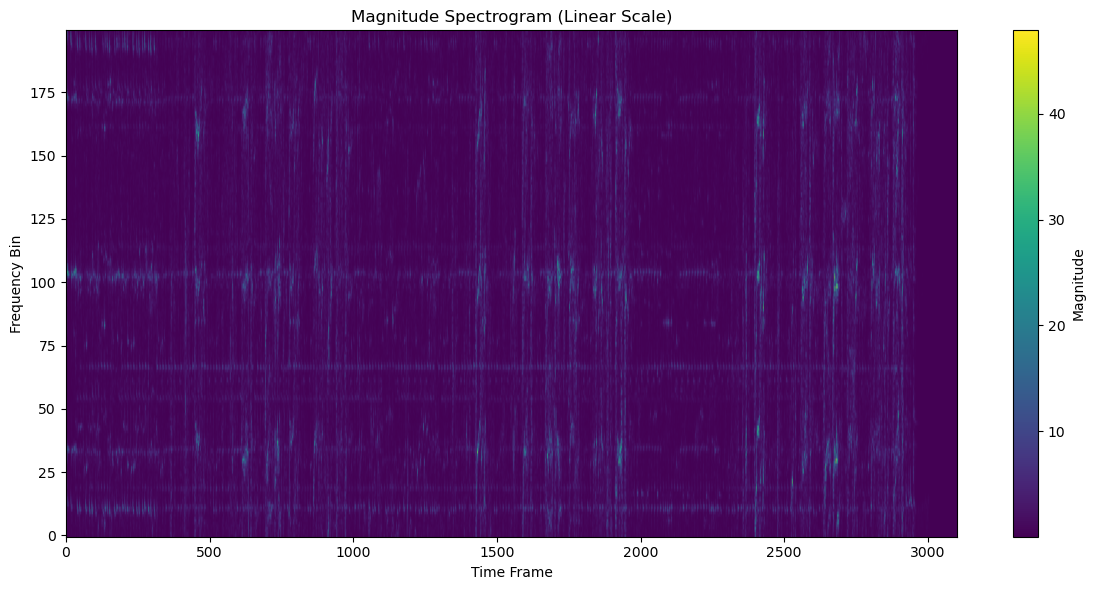

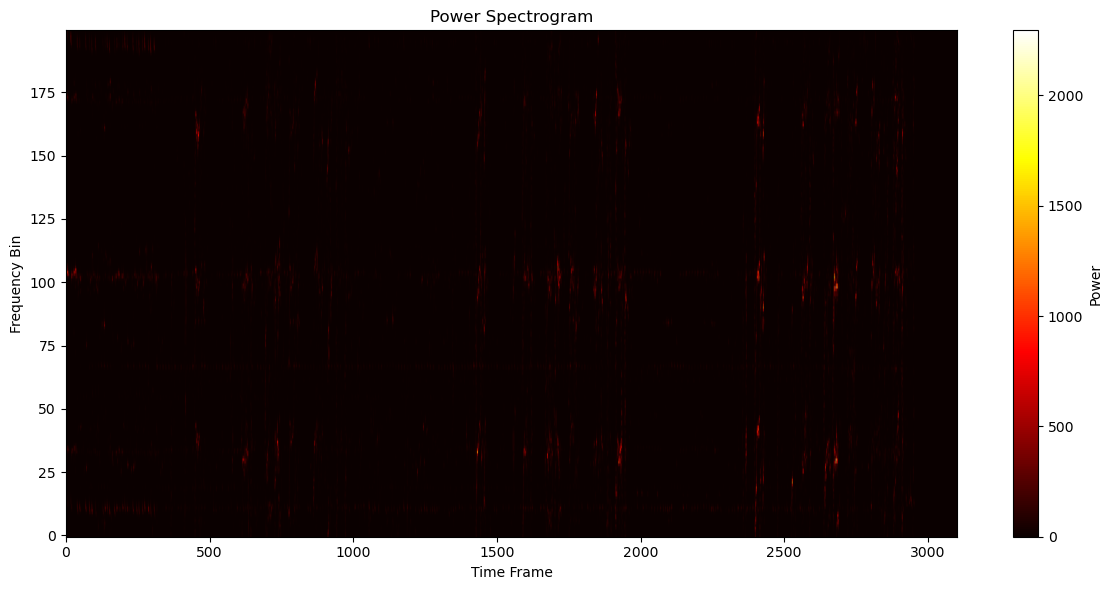

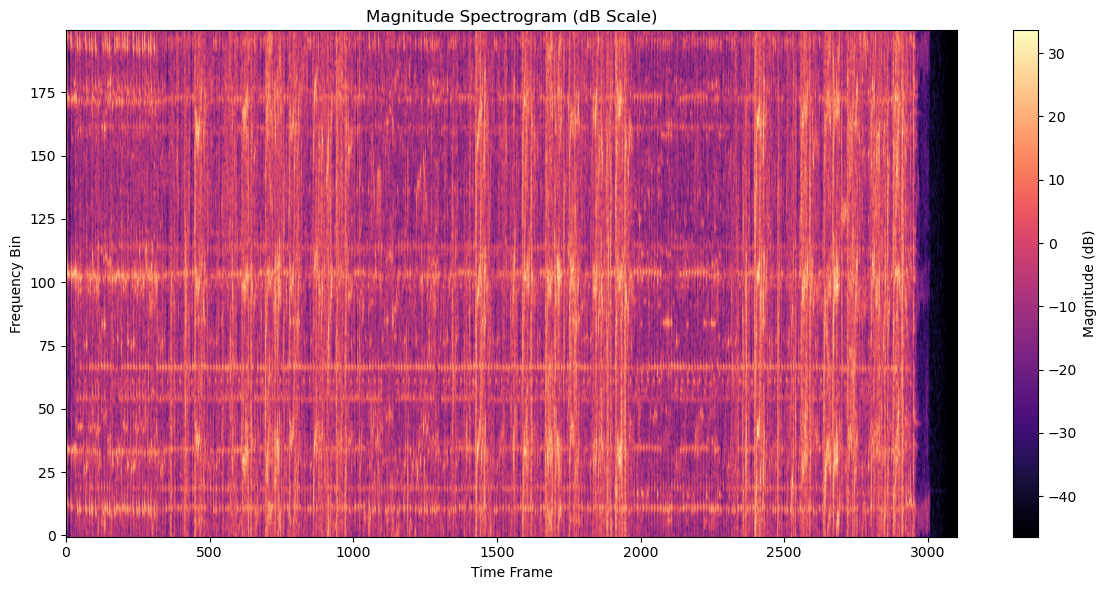

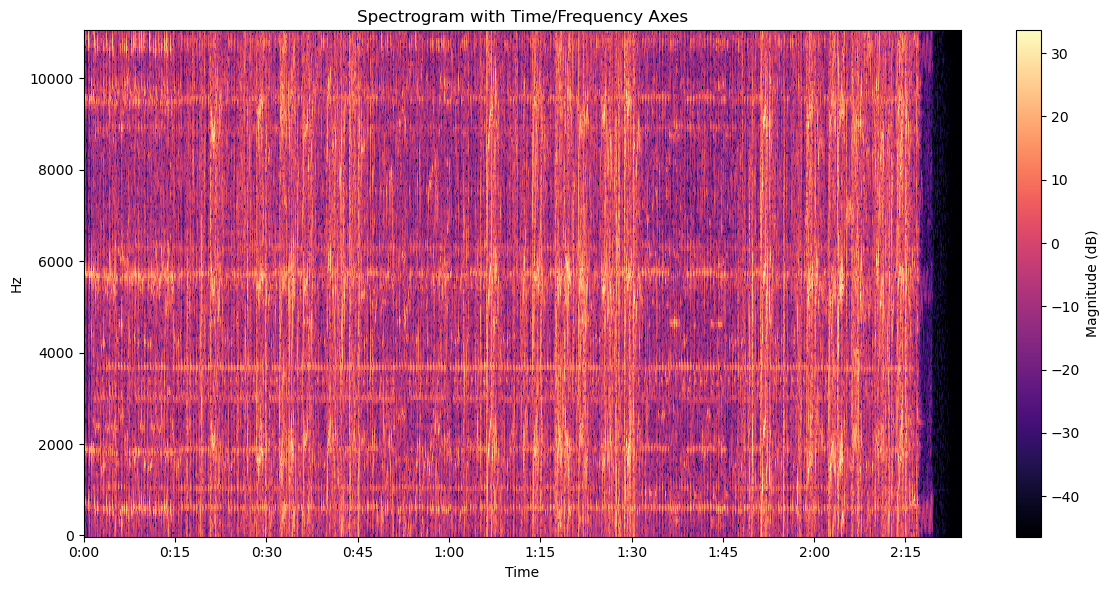

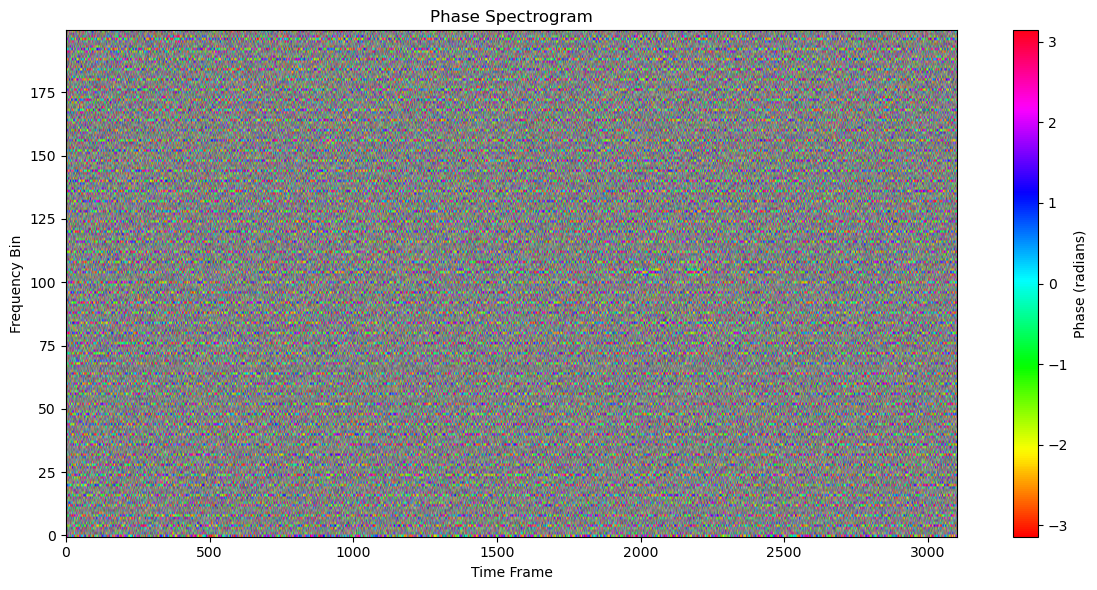

AttributeError: 'Axes' object has no attribute 'colorbar'

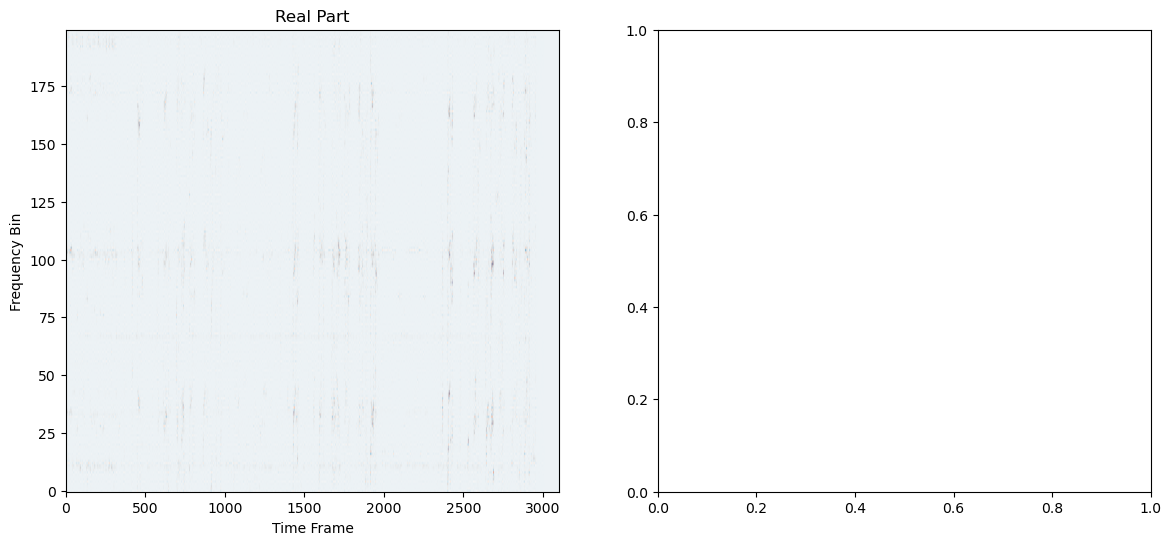

In [62]:
# Visualizations of X

# 1. Magnitude spectrogram (linear scale)
X_mag = np.abs(X)
plt.figure(figsize=(12, 6))
plt.imshow(X_mag, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.title('Magnitude Spectrogram (Linear Scale)')
plt.tight_layout()
plt.show()

# 2. Power spectrogram (magnitude squared)
X_power = np.abs(X)**2
plt.figure(figsize=(12, 6))
plt.imshow(X_power, aspect='auto', origin='lower', cmap='hot')
plt.colorbar(label='Power')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.title('Power Spectrogram')
plt.tight_layout()
plt.show()

# 3. Decibel spectrogram (log scale) - most common
X_db = librosa.amplitude_to_db(X_mag)
plt.figure(figsize=(12, 6))
plt.imshow(X_db, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.title('Magnitude Spectrogram (dB Scale)')
plt.tight_layout()
plt.show()

# 4. Using librosa's built-in display (with proper time/freq axes)
T_coef = librosa.frames_to_time(np.arange(X.shape[1]), sr=Fs, hop_length=H)
F_coef = librosa.fft_frequencies(sr=Fs, n_fft=N)

plt.figure(figsize=(12, 6))
librosa.display.specshow(X_db, x_axis='time', y_axis='hz', 
                         sr=Fs, hop_length=H, cmap='magma')
plt.colorbar(label='Magnitude (dB)')
plt.title('Spectrogram with Time/Frequency Axes')
plt.tight_layout()
plt.show()

# 5. Phase spectrogram
X_phase = np.angle(X)
plt.figure(figsize=(12, 6))
plt.imshow(X_phase, aspect='auto', origin='lower', cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.title('Phase Spectrogram')
plt.tight_layout()
plt.show()

# 6. Real and Imaginary parts separately
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(X.real, aspect='auto', origin='lower', cmap='RdBu')
axes[0].set_title('Real Part')
axes[0].set_xlabel('Time Frame')
axes[0].set_ylabel('Frequency Bin')
axes[0].colorbar()  

axes[1].imshow(X.imag, aspect='auto', origin='lower', cmap='RdBu')
axes[1].set_title('Imaginary Part')
axes[1].set_xlabel('Time Frame')
axes[1].set_ylabel('Frequency Bin')
axes[1].colorbar()

plt.tight_layout()
plt.show()

=== Pandas DataFrame View ===
         0.00s  0.05s  0.09s     0.14s     0.19s     0.23s     0.28s  \
0.0 Hz     0.0    0.0    0.0  0.000049  0.000434  0.000433  0.097010   
5.4 Hz     0.0    0.0    0.0  0.000045  0.000455  0.000860  0.142194   
10.8 Hz    0.0    0.0    0.0  0.000041  0.000387  0.000411  0.196400   
16.1 Hz    0.0    0.0    0.0  0.000036  0.000256  0.000646  0.253530   
21.5 Hz    0.0    0.0    0.0  0.000032  0.000110  0.000295  0.305621   
26.9 Hz    0.0    0.0    0.0  0.000029  0.000041  0.000146  0.342654   
32.3 Hz    0.0    0.0    0.0  0.000029  0.000130  0.000246  0.354506   
37.7 Hz    0.0    0.0    0.0  0.000031  0.000204  0.000328  0.335092   
43.1 Hz    0.0    0.0    0.0  0.000035  0.000218  0.000681  0.289435   
48.4 Hz    0.0    0.0    0.0  0.000041  0.000178  0.000207  0.247276   

            0.33s     0.37s     0.42s  
0.0 Hz   0.290538  0.300816  0.061886  
5.4 Hz   0.463140  0.406382  0.049570  
10.8 Hz  0.565549  0.478520  0.149525  
16.1 Hz  0.643294

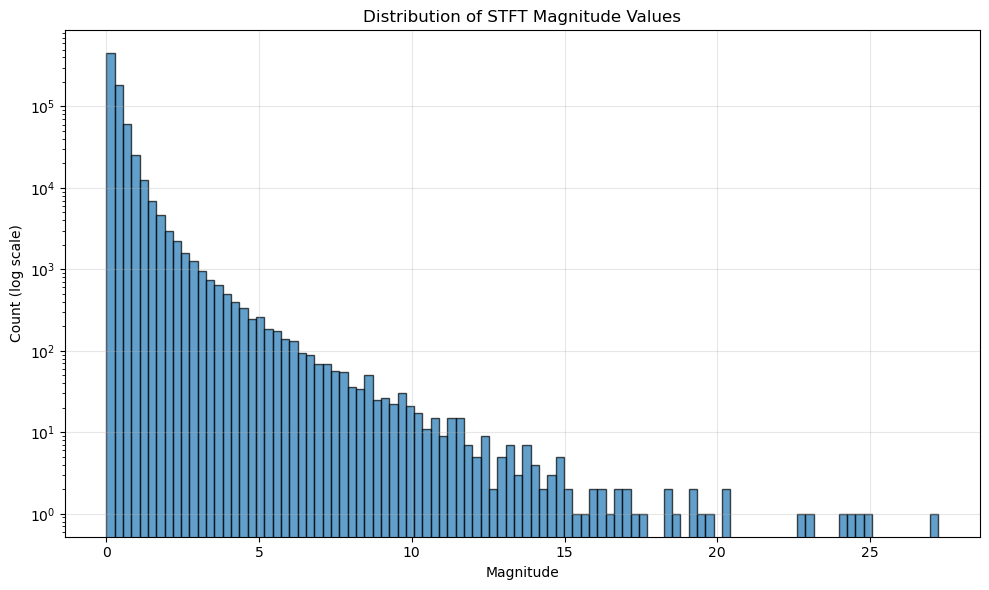


=== Slicing Examples ===
Every 100th frequency bin, every 50th time frame:
Shape: (2, 76)
Last 100 frequency bins, last 100 time frames:
Shape: (100, 100)

=== Data Quality Check ===
NaN values: 0
Inf values: 0
Zero values: 11000


In [ ]:
# Additional viewing options

# 1. View as pandas DataFrame (useful for small slices)
print("=== Pandas DataFrame View ===")
# View a small slice as DataFrame
X_mag_slice = np.abs(X[:10, :10])
df = pd.DataFrame(X_mag_slice, 
                  index=[f'{f:.1f} Hz' for f in F_coef[:10]],
                  columns=[f'{t:.2f}s' for t in T_coef[:10]])
print(df)

# 2. View specific frequency/time ranges
print("\n=== Specific Ranges ===")
# View frequency range around 1000 Hz
freq_idx = np.argmin(np.abs(F_coef - 1000))
print(f"Frequency bin {freq_idx} = {F_coef[freq_idx]:.1f} Hz")
print(f"Magnitude at this frequency (first 10 frames):")
print(np.abs(X[freq_idx, :10]))

# View time range around 5 seconds
time_idx = np.argmin(np.abs(T_coef - 5.0))
print(f"\nTime frame {time_idx} = {T_coef[time_idx]:.2f} seconds")
print(f"Magnitude at this time (first 10 frequency bins):")
print(np.abs(X[:10, time_idx]))

# 3. Histogram of magnitude values
plt.figure(figsize=(10, 6))
plt.hist(X_mag.flatten(), bins=100, log=True, edgecolor='black', alpha=0.7)
plt.xlabel('Magnitude')
plt.ylabel('Count (log scale)')
plt.title('Distribution of STFT Magnitude Values')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Slicing and indexing examples
print("\n=== Slicing Examples ===")
print("Every 100th frequency bin, every 50th time frame:")
print(f"Shape: {X[::100, ::50].shape}")
print("Last 100 frequency bins, last 100 time frames:")
print(f"Shape: {X[-100:, -100:].shape}")

# 5. Check for NaN or Inf values
print("\n=== Data Quality Check ===")
print(f"NaN values: {np.isnan(X).sum()}")
print(f"Inf values: {np.isinf(X).sum()}")
print(f"Zero values: {(X == 0).sum()}")

In [63]:
# Get time and frequency coefficients
# Time axis: convert frame indices to time in seconds
T_coef = librosa.frames_to_time(np.arange(X.shape[1]), sr=Fs, hop_length=H)
# Frequency axis: get frequency bins in Hz
F_coef = librosa.fft_frequencies(sr=Fs, n_fft=N)
